In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.7 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9e1d111d756aafece463413c56e842f3623a54c0511b917b32c1c327f9fc46d3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT , CCXGate, UnitaryGate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vector = [1, 2, 3, 4, 5, 6, 7, 8]

vector_norm = np.linalg.norm(vector)
normalized_vector = vector / vector_norm
num_qubits = int(np.log2(len(vector)))
num_overlap = 2

print(normalized_vector)
print(normalized_vector*vector_norm)
print(num_qubits)

[0.070014   0.14002801 0.21004201 0.28005602 0.35007002 0.42008403
 0.49009803 0.56011203]
[1. 2. 3. 4. 5. 6. 7. 8.]
3


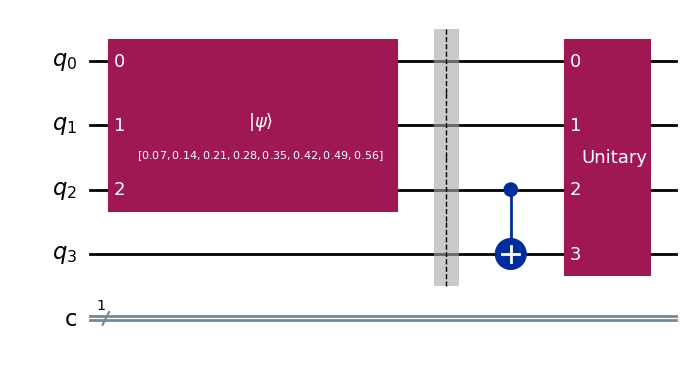

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
# padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
#     4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]
padded_result_coeffs = normalized_vector

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

# Define the original permutation matrix (acts on 3 qubits)
# perm_matrix = np.array([
#     [1, 0, 0, 0, 0, 0, 0, 0],
#     [0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 1, 0],
#     [0, 0, 0, 0, 0, 0, 0, 1]
# ])

perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0]
])  # this is modified version of one before so that the last two coeffcients as well move up two places, this gives a neet output at the end with no zeroes in the middle like was the case with before

# Identity matrix for the other qubits
identity_matrix = np.eye(8)

# Construct the controlled matrix:
# Block matrix with identity on top-left and the permutation matrix on bottom-right
controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((8, 8))],
    [np.zeros((8, 8)), perm_matrix]
])

# print("Controlled Permutation Matrix:")
# print(controlled_perm_matrix)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, [0 ,1 ,2, 3])
# qc_test.append(unitary_gate, [3, 0 ,1 ,2])

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", np.real(statevector))
print()
# print("adjusted Final Statevector:", np.sqrt(2)*np.abs(statevector))

print(normalized_vector)

Final Statevector: [0.070014   0.14002801 0.21004201 0.28005602 0.         0.
 0.         0.         0.         0.         0.35007002 0.42008403
 0.49009803 0.56011203 0.         0.        ]

[0.070014   0.14002801 0.21004201 0.28005602 0.35007002 0.42008403
 0.49009803 0.56011203]


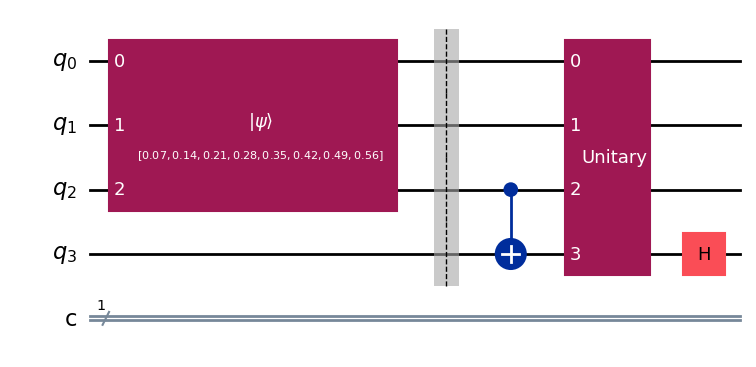

In [ ]:
qc_test.h(3)
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
# print("adjusted Final Statevector with abs:", np.sqrt(2)*np.abs(statevector))
# print()
print("Adjusted Final Statevector [*sqrt(2)]:", np.sqrt(2)*statevector)
print()
print("Adjusted Final Statevector [*sqrt(2)] with real:", np.sqrt(2)*np.real(statevector))
print()
print("Adjusted Final Statevector [*vecotr_norm*sqrt(2)] with real:", vector_norm*np.sqrt(2)*np.real(statevector))
print()
print("Original vecotr:", vector)
print()


[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 0.04950738+0.00000000e+00j,  0.09901475+0.00000000e+00j,
              0.39605902-3.03145255e-17j,  0.49507377-3.63774306e-17j,
              0.34655164-4.24403357e-17j,  0.39605902-4.85032408e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.04950738+0.00000000e+00j,  0.09901475+0.00000000e+00j,
             -0.09901475+3.03145255e-17j, -0.09901475+3.63774306e-17j,
             -0.34655164+4.24403357e-17j, -0.39605902+4.85032408e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))

Adjusted Final Statevector [*sqrt(2)]: Statevector([ 0.070014  +0.00000000e+00j,  0.14002801+0.00000000e+00j,
              0.56011203-4.28712131e-17j,  0.70014004-5.14454557e-17j,
              0.49009803-6.00196983e-17j,  0.56011203-6.85939409e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.070014  +0.00000000e+00j,  0.14002801+0.0

[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

Check sum and difference with below:

sum:

-6.52830735e-01 + 4.04440838e-01 = −0.248389897

-1.40302564e-01 + -5.49152208e-02 = −0.195217784

difference:

-6.52830735e-01 - 4.04440838e-01 = −1.057271573

-1.40302564e-01 - -5.49152208e-02 = −0.0853873432

In [ ]:
def build_perm_matrix(num_qubits, num_overlap):
  p = np.eye(2**num_qubits)
  p[num_overlap:,:] = np.roll(p[num_overlap:,:], - num_overlap, axis=0)
  return p

print(build_perm_matrix(3, 2))
i = np.shape(perm_matrix)[0]
identity_matrix = np.eye(i)
print(identity_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
def build_controlled_perm_matrix(perm_matrix):
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return controlled_perm_matrix

print(build_controlled_perm_matrix(build_perm_matrix(3, 2)))


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
def build_perm_matrix(num_qubits, num_overlap):
  p = np.eye(2**num_qubits)
  p[num_overlap:,:] = np.roll(p[num_overlap:,:], - num_overlap, axis=0)
  return p


def build_controlled_perm_matrix1(num_qubits, num_overlap):
  perm_matrix = np.eye(2**num_qubits)
  perm_matrix[num_overlap:,:] = np.roll(perm_matrix[num_overlap:,:], - num_overlap, axis=0)
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return perm_matrix, controlled_perm_matrix

print(build_controlled_perm_matrix1(4, 6)[0])


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]




---



---



---



In [ ]:
def pad_to_power_of_two_overlap(coeffs):
    length = len(coeffs)
    next_power_of_two = 1 << (length - 1).bit_length()
    return coeffs + [0] * (next_power_of_two - length)
a = [1,2,3,5,5]
b = [4,5,6]
print(a+b)
padded_a = pad_to_power_of_two_overlap(a)
padded_b = pad_to_power_of_two_overlap(b)
print(padded_a)
print(padded_b)
print(padded_a+padded_b)
vector = padded_a+padded_b
print(vector)

[1, 2, 3, 5, 5, 4, 5, 6]
[1, 2, 3, 5, 5, 0, 0, 0]
[4, 5, 6, 0]
[1, 2, 3, 5, 5, 0, 0, 0, 4, 5, 6, 0]
[1, 2, 3, 5, 5, 0, 0, 0, 4, 5, 6, 0]




---



---



In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    # Find the length of the longer array
    max_length = max(len(a), len(b))

    # Find the next power of two greater than or equal to the max length
    next_power_of_two = 1 << (max_length - 1).bit_length()

    # Pad both arrays to this length
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))

    return padded_a, padded_b, next_power_of_two - len(a)

# Example usage:
a = [1, 2, 3, 4, 5, 6]
b = [7, 8, 9]
padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b) # padding needs to be tracked so that appropriate overlap can be performed. we dont want to overlap the zeroes alone.
print("Padded a:", padded_a)
print("Padded b:", padded_b)
print("Padding:", padding)
print("Combined vector:", padded_a + padded_b)
# print(len(a)+len(b)-num_overlap_nopad)

Padded a: [1, 2, 3, 4, 5, 6, 0, 0]
Padded b: [7, 8, 9, 0, 0, 0, 0, 0]
Padding: 2
Combined vector: [1, 2, 3, 4, 5, 6, 0, 0, 7, 8, 9, 0, 0, 0, 0, 0]


In [ ]:
vector = [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
vector = padded_a + padded_b
print(vector)

vector_norm = np.linalg.norm(vector)
normalized_vector = vector / vector_norm
num_qubits = int(np.log2(len(vector)))
num_overlap_nopad = 2
num_overlap = num_overlap_nopad + padding

statevector_slice_point = len(a)+len(b)-num_overlap_nopad
print(statevector_slice_point)
print(normalized_vector)
print(normalized_vector*vector_norm)
print(num_qubits)

[1, 2, 3, 4, 5, 6, 0, 0, 7, 8, 9, 0, 0, 0, 0, 0]
7
[0.05923489 0.11846978 0.17770466 0.23693955 0.29617444 0.35540933
 0.         0.         0.41464421 0.4738791  0.53311399 0.
 0.         0.         0.         0.        ]
[1. 2. 3. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0.]
4


In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
# padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
#     4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]
padded_result_coeffs = normalized_vector

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(num_qubits - 1, num_qubits)

###################################

def build_controlled_perm_matrix(num_qubits, num_overlap):
  perm_matrix = np.eye(2**num_qubits)
  perm_matrix[num_overlap:,:] = np.roll(perm_matrix[num_overlap:,:], - num_overlap, axis=0)
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return perm_matrix, controlled_perm_matrix

perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

###############################################
# print("Controlled Permutation Matrix:")
# print(controlled_perm_matrix)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, range(0,num_qubits+1))

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

qc_test.h(num_qubits)
qc_test.draw('mpl')

# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
# print("adjusted Final Statevector with abs:", np.sqrt(2)*np.abs(statevector))
# print()
print("Adjusted Final Statevector [*sqrt(2)]:", np.sqrt(2)*statevector)
print()
print("Adjusted Final Statevector [*sqrt(2)] with real:", np.sqrt(2)*np.real(statevector))
print()
print("Adjusted Final Statevector [*vector_norm*sqrt(2)] with real:", vector_norm*np.sqrt(2)*np.real(statevector))
print()
print("Original vector:", vector)
print()
###################
resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]

overlap_add_output = vector_norm*np.sqrt(2)*np.real(resulting_state)
print(overlap_add_output)

Final Statevector: Statevector([ 0.04188539+0.00000000e+00j,  0.08377078+0.00000000e+00j,
              0.12565617+0.00000000e+00j,  0.16754156+0.00000000e+00j,
              0.50262469-3.59063669e-17j,  0.58639547-4.10358478e-17j,
              0.37696852-4.61653288e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.04188539+0.00000000e+00j,  0.08377078+0.00000000e+00j,
              0.12565617+0.00000000e+00j,  0.16754156+0.00000000e+00j,
             -0.08377078+3.59063669e-17j, -0.08377078+4.10358478e-17j,
             -0.37696852+4.61653288e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00

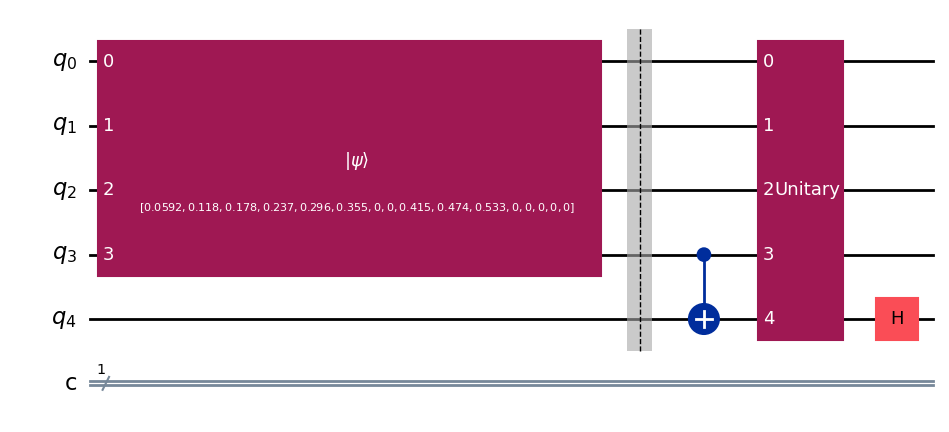

In [ ]:
qc_test.draw('mpl')



---



---



---



In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    # Find the length of the longer array
    max_length = max(len(a), len(b))

    # Find the next power of two greater than or equal to the max length
    next_power_of_two = 1 << (max_length - 1).bit_length()

    # Pad both arrays to this length
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))

    return padded_a, padded_b, next_power_of_two - len(a)

# Example usage:
a = [1, 2, 3, 4, 5,6,7, 8, 1, 2, 3, 4, 5,6,7, 8]
b = [1, 2, 3, 4, 5,6,7, 8, 1, 2, 3, 4, 5,6,7, 8]
padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b) # padding needs to be tracked so that appropriate overlap can be performed. we dont want to overlap the zeroes alone.
print("Padded a:", padded_a)
print("Padded b:", padded_b)
print("Padding:", padding)

# vector = [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
vector = padded_a + padded_b
print("input padded vector", vector)

vector_norm = np.linalg.norm(vector)
normalized_vector = vector / vector_norm
num_qubits = int(np.log2(len(vector)))
num_overlap_nopad = 9
num_overlap = num_overlap_nopad + padding

statevector_slice_point = len(a)+len(b)-num_overlap_nopad
print("statevector_slice_point",statevector_slice_point)
print("num overlap", num_overlap)
print("normalized_vector",normalized_vector)
print(normalized_vector*vector_norm)
print("num_qubits",num_qubits)

padded_result_coeffs = normalized_vector

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))



# New code with CCX gates
qc_test.barrier()

qc_test.cx(num_qubits - 1, num_qubits)

###################################

def build_controlled_perm_matrix(num_qubits, num_overlap):
  perm_matrix = np.eye(2**num_qubits)
  perm_matrix[num_overlap:,:] = np.roll(perm_matrix[num_overlap:,:], - num_overlap, axis=0)
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return perm_matrix, controlled_perm_matrix

perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

###############################################

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, range(0,num_qubits+1))

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

qc_test.h(num_qubits)
qc_test.draw('mpl')

# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()


print("Adjusted Final Statevector [*vector_norm*sqrt(2)] with real:", vector_norm*np.sqrt(2)*np.real(statevector))
print()
print("Original vector:", vector)
print()
###################
resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]

overlap_add_output = vector_norm*np.sqrt(2)*np.real(resulting_state)
print("sliced norm adjusted overlap add ouput:", overlap_add_output)

Padded a: [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
Padded b: [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
Padding: 0
input padded vector [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]
statevector_slice_point 23
num overlap 9
normalized_vector [0.035007   0.070014   0.10502101 0.14002801 0.17503501 0.21004201
 0.24504901 0.28005602 0.035007   0.070014   0.10502101 0.14002801
 0.17503501 0.21004201 0.24504901 0.28005602 0.035007   0.070014
 0.10502101 0.14002801 0.17503501 0.21004201 0.24504901 0.28005602
 0.035007   0.070014   0.10502101 0.14002801 0.17503501 0.21004201
 0.24504901 0.28005602]
[1. 2. 3. 4. 5. 6. 7. 8. 1. 2. 3. 4. 5. 6. 7. 8. 1. 2. 3. 4. 5. 6. 7. 8.
 1. 2. 3. 4. 5. 6. 7. 8.]
num_qubits 5
Adjusted Final Statevector [*vector_norm*sqrt(2)] with real: [ 1.  2.  3.  4.  5.  6.  7.  8.  1.  5.  7.  9. 11. 13. 15.  9.  2.  3.
  4.  5.  6.  7.  8.  0.  0.  0.  0.  0.  0.  0.  1.  2.  1.  2.  3.  4.
  5.  6.  7.  8.  1

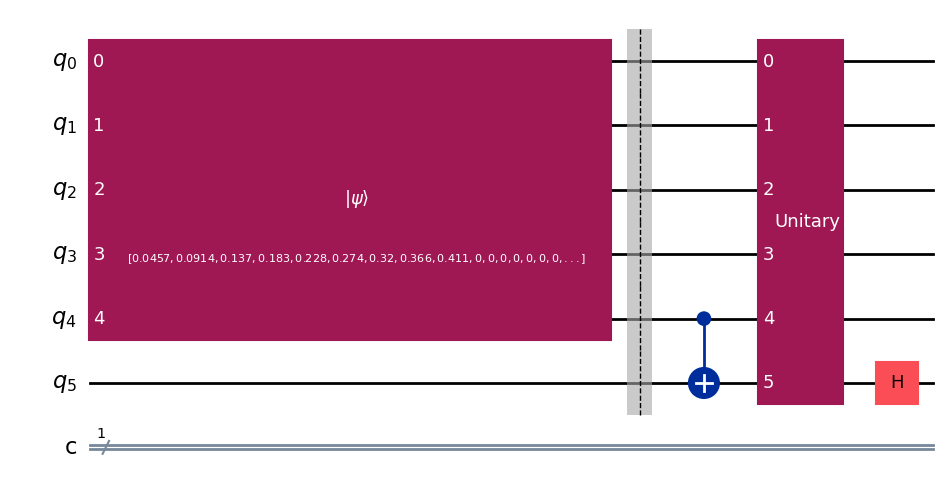

In [ ]:
qc_test.draw('mpl')



---



---



In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    # Find the length of the longer array
    max_length = max(len(a), len(b))

    # Find the next power of two greater than or equal to the max length
    next_power_of_two = 1 << (max_length - 1).bit_length()

    # Pad both arrays to this length
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))

    return padded_a, padded_b, next_power_of_two - len(a)

def build_controlled_perm_matrix(num_qubits, num_overlap):
  perm_matrix = np.eye(2**num_qubits)
  perm_matrix[num_overlap:,:] = np.roll(perm_matrix[num_overlap:,:], - num_overlap, axis=0)
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return perm_matrix, controlled_perm_matrix

# Example usage:
a = [1, 2, 3, 4, 5,6,7, 8, 1, 2, 3, 4, 5,6,7, 8]
b = [1, 2, 3, 4, 5,6,7, 8, 1, 2, 3, 4, 5,6,7, 8]
padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b) # padding needs to be tracked so that appropriate overlap can be performed. we dont want to overlap the zeroes alone.

vector = padded_a + padded_b
print("input padded vector", vector)

vector_norm = np.linalg.norm(vector)
normalized_vector = vector / vector_norm
num_qubits = int(np.log2(len(vector)))
num_overlap_nopad = 9
num_overlap = num_overlap_nopad + padding

statevector_slice_point = len(a)+len(b)-num_overlap_nopad
padded_result_coeffs = normalized_vector

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(num_qubits - 1, num_qubits)

perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, range(0,num_qubits+1))

qc_test.h(num_qubits)
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()


print("Adjusted Final Statevector [*vector_norm*sqrt(2)] with real:", vector_norm*np.sqrt(2)*np.real(statevector))
print()
print("Original vector:", vector)
print()
###################
resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]

overlap_add_output = vector_norm*np.sqrt(2)*np.real(resulting_state)
print("sliced norm adjusted overlap add ouput:", overlap_add_output)

[1, 2, 7, 5, 13, 8, 9]
[4, 5, 6]


In [ ]:
qc_test.cx(num_qubits - 1, num_qubits)

perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, range(0,num_qubits+1))

qc_test.h(num_qubits)

In [ ]:
def build_controlled_perm_matrix(num_qubits, num_overlap):
  perm_matrix = np.eye(2**num_qubits)
  perm_matrix[num_overlap:,:] = np.roll(perm_matrix[num_overlap:,:], - num_overlap, axis=0)
  i = np.shape(perm_matrix)[0]
  identity_matrix = np.eye(i)
  controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((i, i))],
    [np.zeros((i, i)), perm_matrix]
  ])
  return perm_matrix, controlled_perm_matrix

def quantum_sequential_overlap_add(segments, overlap_length):
    final_statevector = None

    for i, segment in enumerate(segments):
        if i == 0:
            # First segment, initialize statevector
            padded_segment = segment + [0] * (len(segments[0]) - len(segment))
            vector_norm = np.linalg.norm(padded_segment)
            normalized_vector = np.array(padded_segment) / vector_norm
            num_qubits = int(np.log2(len(normalized_vector)))

            qc_test = QuantumCircuit(num_qubits, 1)
            qc_test.initialize(normalized_vector, range(num_qubits))

            # Run the circuit
            simulator = Aer.get_backend('statevector_simulator')
            compiled_circuit = transpile(qc_test, simulator)
            result = simulator.run(compiled_circuit).result()
            final_statevector = result.get_statevector()

        else:
        #     # For subsequent segments
            overlap_start_index = len(final_statevector) - overlap_length

            # Apply quantum overlap logic (as in the previous example)
            padded_segment = segment + [0] * (len(segments[0]) - len(segment))
            vector_norm = np.linalg.norm(padded_segment)
            normalized_vector = np.array(padded_segment) / vector_norm

            num_qubits = int(np.log2(len(normalized_vector)))
            qc_test = QuantumCircuit(num_qubits + 1, 1)
            qc_test.initialize(normalized_vector, range(num_qubits))

            ###################
            # Apply controlled operations to perform the overlap-add
            qc_test.cx(num_qubits - 1, num_qubits)

            perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, overlap_length)

            # Create the unitary gate from the permutation matrix
            unitary_gate = UnitaryGate(controlled_perm_matrix)

            # Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
            qc_test.append(unitary_gate, range(0,num_qubits+1))

            qc_test.h(num_qubits)
            #################

            simulator = Aer.get_backend('statevector_simulator')
            compiled_circuit = transpile(qc_test, simulator)
            result = simulator.run(compiled_circuit).result()

            new_statevector = result.get_statevector()
            # Combine this with the final statevector by adding the overlapping parts and appending the rest

            for j in range(overlap_length):
                final_statevector[overlap_start_index + j] += new_statevector[j]

            final_statevector = np.concatenate((final_statevector, new_statevector[overlap_length:]))

    return final_statevector

# Example usage
segments = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
overlap_length = 1
final_statevector = quantum_sequential_overlap_add(segments, overlap_length)
print(final_statevector)


TypeError: object of type 'NoneType' has no len()

In [ ]:
# Function to pad and normalize input vectors
def pad_to_power_of_two_based_on_longest(a, b):
    max_length = max(len(a), len(b))
    next_power_of_two = 1 << (max_length - 1).bit_length()
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))
    return padded_a, padded_b, next_power_of_two - len(a)

# Function to build the controlled permutation matrix
def build_controlled_perm_matrix(num_qubits, num_overlap):
    perm_matrix = np.eye(2**num_qubits)
    perm_matrix[num_overlap:, :] = np.roll(perm_matrix[num_overlap:, :], -num_overlap, axis=0)
    i = np.shape(perm_matrix)[0]
    identity_matrix = np.eye(i)
    controlled_perm_matrix = np.block([
        [identity_matrix, np.zeros((i, i))],
        [np.zeros((i, i)), perm_matrix]
    ])
    return perm_matrix, controlled_perm_matrix

# Example input: a list of (a, b) pairs
array_pairs = [
    ([1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8]),
    ([9, 10, 11, 12], [13, 14, 15, 16]),
    ([17, 18, 19, 20], [21, 22, 23, 24])
]

for a, b in array_pairs:
    padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b)

    vector = padded_a + padded_b
    vector_norm = np.linalg.norm(vector)
    normalized_vector = vector / vector_norm
    num_qubits = int(np.log2(len(vector)))
    num_overlap_nopad = 2
    num_overlap = num_overlap_nopad + padding

    statevector_slice_point = len(a) + len(b) - num_overlap_nopad
    padded_result_coeffs = normalized_vector

    qc_test = QuantumCircuit(num_qubits + 1, 1)
    qc_test.initialize(padded_result_coeffs, range(0, num_qubits))

    qc_test.barrier()
    qc_test.cx(num_qubits - 1, num_qubits)

    perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

    unitary_gate = UnitaryGate(controlled_perm_matrix)
    qc_test.append(unitary_gate, range(0, num_qubits + 1))

    qc_test.h(num_qubits)

    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc_test, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector()
    resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]
    overlap_add_output = vector_norm * np.sqrt(2) * np.real(resulting_state)

    print("Overlap-add output for this pair:", overlap_add_output)


Overlap-add output for this pair: [ 3.  4.  5.  6.  8. 10.  3.  4.  5.  6.  7.  8.]
Overlap-add output for this pair: [24. 26. 15. 16.]
Overlap-add output for this pair: [40. 42. 23. 24.]


In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    max_length = max(len(a), len(b))
    next_power_of_two = 1 << (max_length - 1).bit_length()
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))
    return padded_a, padded_b, next_power_of_two - len(a)

def build_controlled_perm_matrix(num_qubits, num_overlap):
    perm_matrix = np.eye(2**num_qubits)
    perm_matrix[num_overlap:, :] = np.roll(perm_matrix[num_overlap:, :], -num_overlap, axis=0)
    i = np.shape(perm_matrix)[0]
    identity_matrix = np.eye(i)
    controlled_perm_matrix = np.block([
        [identity_matrix, np.zeros((i, i))],
        [np.zeros((i, i)), perm_matrix]
    ])
    return perm_matrix, controlled_perm_matrix

# Example input: a list of arrays [a, b, c, d]
arrays = [
    [1, 2, 3, 4, 5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20]
]

final_result = []

for i in range(len(arrays) - 1):
    a = arrays[i]
    b = arrays[i + 1]
    padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b)

    vector = padded_a + padded_b
    vector_norm = np.linalg.norm(vector)
    normalized_vector = vector / vector_norm
    num_qubits = int(np.log2(len(vector)))
    num_overlap_nopad = 2
    num_overlap = num_overlap_nopad + padding

    statevector_slice_point = len(a) + len(b) - num_overlap_nopad
    padded_result_coeffs = normalized_vector

    qc_test = QuantumCircuit(num_qubits + 1, 1)
    qc_test.initialize(padded_result_coeffs, range(0, num_qubits))

    qc_test.barrier()
    qc_test.cx(num_qubits - 1, num_qubits)

    perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

    unitary_gate = UnitaryGate(controlled_perm_matrix)
    qc_test.append(unitary_gate, range(0, num_qubits + 1))

    qc_test.h(num_qubits)

    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc_test, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector()
    resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]
    overlap_add_output = vector_norm * np.sqrt(2) * np.real(resulting_state)

    if i == 0:
        final_result.extend(overlap_add_output)
    else:
        # Overlap-add with the previous final result
        overlap_start_index = len(final_result) - num_overlap_nopad
        for j in range(num_overlap_nopad):
            final_result[overlap_start_index + j] += overlap_add_output[j]
        final_result.extend(overlap_add_output[num_overlap_nopad:])

print("Final stitched result:", final_result)


Final stitched result: [3.0, 4.0, 5.0, 6.0, 16.0, 18.0, 35.0, 38.0, 47.0, 50.00000000000001, 19.0, 20.0]


In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    max_length = max(len(a), len(b))
    next_power_of_two = 1 << (max_length - 1).bit_length()
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))
    return padded_a, padded_b, next_power_of_two - len(a)

def build_controlled_perm_matrix(num_qubits, num_overlap):
    perm_matrix = np.eye(2**num_qubits)
    perm_matrix[num_overlap:, :] = np.roll(perm_matrix[num_overlap:, :], -num_overlap, axis=0)
    i = np.shape(perm_matrix)[0]
    identity_matrix = np.eye(i)
    controlled_perm_matrix = np.block([
        [identity_matrix, np.zeros((i, i))],
        [np.zeros((i, i)), perm_matrix]
    ])
    return perm_matrix, controlled_perm_matrix

# Example input: a list of arrays [a, b, c, d]
arrays = [
    [1, 2, 3, 4, 5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20]
]


for i in range(len(arrays) - 1):
    a = arrays[i]
    b = arrays[i + 1]
    padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b)

    vector = padded_a + padded_b
    vector_norm = np.linalg.norm(vector)
    normalized_vector = vector / vector_norm
    num_qubits = int(np.log2(len(vector)))
    num_overlap_nopad = 2
    num_overlap = num_overlap_nopad + padding

    statevector_slice_point = len(a) + len(b) - num_overlap_nopad
    padded_result_coeffs = normalized_vector

    qc_test = QuantumCircuit(num_qubits + 1, 1)
    qc_test.initialize(padded_result_coeffs, range(0, num_qubits))

    qc_test.barrier()
    qc_test.cx(num_qubits - 1, num_qubits)

    perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

    unitary_gate = UnitaryGate(controlled_perm_matrix)
    qc_test.append(unitary_gate, range(0, num_qubits + 1))

    qc_test.h(num_qubits)

    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc_test, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector()
    resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point- num_overlap_nopad]
    overlap_add_output = vector_norm * np.sqrt(2) * np.real(resulting_state)

    print(f"Overlap-add output for pair ({i}, {i+1}):", overlap_add_output)

Overlap-add output for pair (0, 1): [ 3.  4.  5.  6. 16. 18.]
Overlap-add output for pair (1, 2): [24. 26.]
Overlap-add output for pair (2, 3): [32. 34.]


# correct one


In [ ]:
def pad_to_power_of_two_based_on_longest(a, b):
    max_length = max(len(a), len(b))
    next_power_of_two = 1 << (max_length - 1).bit_length()
    padded_a = a + [0] * (next_power_of_two - len(a))
    padded_b = b + [0] * (next_power_of_two - len(b))
    return padded_a, padded_b, next_power_of_two - len(a)

def build_controlled_perm_matrix(num_qubits, num_overlap):
    perm_matrix = np.eye(2**num_qubits)
    perm_matrix[num_overlap:, :] = np.roll(perm_matrix[num_overlap:, :], -num_overlap, axis=0)
    i = np.shape(perm_matrix)[0]
    identity_matrix = np.eye(i)
    controlled_perm_matrix = np.block([
        [identity_matrix, np.zeros((i, i))],
        [np.zeros((i, i)), perm_matrix]
    ])
    return perm_matrix, controlled_perm_matrix

# Example input: a list of arrays [a, b, c, d]
arrays = [
    [1, 2, 3, 4, 5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20]
]

# Final result
final_result = []

for i in range(len(arrays) - 1):
    a = arrays[i]
    b = arrays[i + 1]
    padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b)

    vector = padded_a + padded_b
    vector_norm = np.linalg.norm(vector)
    normalized_vector = vector / vector_norm
    num_qubits = int(np.log2(len(vector)))
    num_overlap_nopad = 2
    num_overlap = num_overlap_nopad + padding

    statevector_slice_point = len(a) + len(b) - num_overlap_nopad
    padded_result_coeffs = normalized_vector

    qc_test = QuantumCircuit(num_qubits + 1, 1)
    qc_test.initialize(padded_result_coeffs, range(0, num_qubits))

    qc_test.barrier()
    qc_test.cx(num_qubits - 1, num_qubits)

    perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

    unitary_gate = UnitaryGate(controlled_perm_matrix)
    qc_test.append(unitary_gate, range(0, num_qubits + 1))

    qc_test.h(num_qubits)

    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc_test, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector()
    resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point - num_overlap_nopad]
    overlap_add_output = vector_norm * np.sqrt(2) * np.real(resulting_state)

    print(f"Overlap-add output for pair ({i}, {i+1}):", overlap_add_output)

    # Append the output to the final result
    final_result.extend(overlap_add_output)

print("Final continuous array:", final_result)


Overlap-add output for pair (0, 1): [ 3.  4.  5.  6. 16. 18.]
Overlap-add output for pair (1, 2): [24. 26.]
Overlap-add output for pair (2, 3): [32. 34.]
Final continuous array: [3.0, 4.0, 5.0, 6.0, 16.0, 18.0, 24.000000000000004, 26.0, 32.0, 34.00000000000001]


In [ ]:
def sequential_overlap_add(segments, overlap_length):
    final_statevector = []

    for i, segment in enumerate(segments):
        if i == 0:
            # First segment, just append it
            final_statevector.extend(segment)
        else:
            # Find the overlap start index in final_statevector
            overlap_start_index = len(final_statevector) - overlap_length

            # Add the overlapping part
            for j in range(overlap_length):
                final_statevector[overlap_start_index + j] += segment[j]

            # Append the remaining part
            final_statevector.extend(segment[overlap_length:])

    return final_statevector

# Example usage
arrays = [
    [1, 2, 3, 4, 5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20]
]
segments = arrays
overlap_length = 2
final_statevector = sequential_overlap_add(segments, overlap_length)
print(final_statevector)

[1, 2, 3, 4, 5, 6, 16, 18, 24, 26, 32, 34, 19, 20]


In [ ]:
# Final result list for all outputs
all_overlap_outputs = []

# Final result for the continuous array
final_result = []

for i in range(len(arrays) - 1):
    a = arrays[i]
    b = arrays[i + 1]
    padded_a, padded_b, padding = pad_to_power_of_two_based_on_longest(a, b)

    vector = padded_a + padded_b
    vector_norm = np.linalg.norm(vector)
    normalized_vector = vector / vector_norm
    num_qubits = int(np.log2(len(vector)))
    num_overlap_nopad = 2
    num_overlap = num_overlap_nopad + padding

    statevector_slice_point = len(a) + len(b) - num_overlap_nopad
    padded_result_coeffs = normalized_vector

    qc_test = QuantumCircuit(num_qubits + 1, 1)
    qc_test.initialize(padded_result_coeffs, range(0, num_qubits))

    qc_test.barrier()
    qc_test.cx(num_qubits - 1, num_qubits)

    perm_matrix, controlled_perm_matrix = build_controlled_perm_matrix(num_qubits, num_overlap)

    unitary_gate = UnitaryGate(controlled_perm_matrix)
    qc_test.append(unitary_gate, range(0, num_qubits + 1))

    qc_test.h(num_qubits)

    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(qc_test, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector()
    resulting_state = Statevector(statevector).data[num_overlap_nopad:statevector_slice_point]
    overlap_add_output = vector_norm * np.sqrt(2) * np.real(resulting_state)

    print(f"Overlap-add output for pair ({i}, {i+1}):", overlap_add_output)

    # Save each overlap add output to a list
    all_overlap_outputs.append(overlap_add_output)

    # Append the output to the final result
    final_result.extend(overlap_add_output)

print("Final continuous array:", final_result)
print("All overlap-add outputs:", all_overlap_outputs)


Overlap-add output for pair (0, 1): [ 3.  4.  5.  6. 16. 18. 11. 12.]
Overlap-add output for pair (1, 2): [24. 26. 15. 16.]
Overlap-add output for pair (2, 3): [32. 34. 19. 20.]
Final continuous array: [3.0, 4.0, 5.0, 6.0, 16.0, 18.0, 10.999999999999998, 11.999999999999998, 24.000000000000004, 26.0, 15.000000000000002, 16.0, 32.0, 34.00000000000001, 19.0, 20.0]
All overlap-add outputs: [array([ 3.,  4.,  5.,  6., 16., 18., 11., 12.]), array([24., 26., 15., 16.]), array([32., 34., 19., 20.])]
